# **Import Libraries**

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

import cv2 as cv
import numpy as np


# **Check the using devices**

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7138577625372841913
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1867567332044230791
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Loading Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Data Inspecting and Visualization

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


<Figure size 432x288 with 0 Axes>

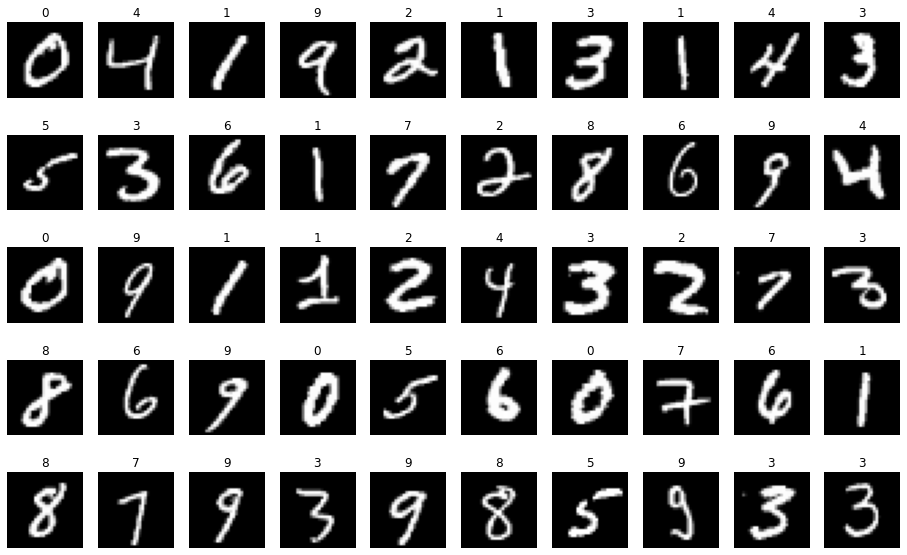

In [4]:
print(f"Shape of x_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")

figure = plt.figure()
plt.figure(figsize=(16, 10))

num_images = 50
for i in range(1, num_images + 1):
  plt.subplot(5, 10, i).set_title(f'{y_train[i]}')
  plt.axis('off')
  plt.imshow(x_train[i], cmap='gray')

## Preprocessing Data

In [5]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

input_shape = (img_rows, img_cols, 1)

print(f"Shape of x_train {x_train.shape}")
print(f"Shape of x_test {x_test.shape}")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"Sample y_train data {y_train[0]}")

num_classes = y_train.shape[1]
print(f"Number Classes {num_classes}")

Shape of x_train (60000, 28, 28, 1)
Shape of x_test (10000, 28, 28, 1)
Sample y_train data [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Number Classes 10


## Building Model

In [6]:
L2 = 0.001
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',  
                 kernel_regularizer = regularizers.l2(L2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',
                  kernel_regularizer = regularizers.l2(L2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.001), 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

## Training Model

In [7]:
batch_size = 128
epochs = 25

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy', score[1])

Epoch 1/25
469/469 [==============================] - 16s 11ms/step - loss: 0.6848 - accuracy: 0.7978 - val_loss: 0.4769 - val_accuracy: 0.9076
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3415 - accuracy: 0.9081 - val_loss: 0.1977 - val_accuracy: 0.9557
Epoch 3/25
469/469 [==============================] - 5s 11ms/step - loss: 0.2728 - accuracy: 0.9306 - val_loss: 0.1682 - val_accuracy: 0.9629
Epoch 4/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2359 - accuracy: 0.9413 - val_loss: 0.1497 - val_accuracy: 0.9677
Epoch 5/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2099 - accuracy: 0.9491 - val_loss: 0.1373 - val_accuracy: 0.9712
Epoch 6/25
469/469 [==============================] - 5s 10ms/step - loss: 0.1931 - accuracy: 0.9546 - val_loss: 0.1299 - val_accuracy: 0.9726
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 0.1793 - accuracy: 0.9582 - val_loss: 0.1231 - val_accuracy: 0.974

## Plotting Accuracy and Loss

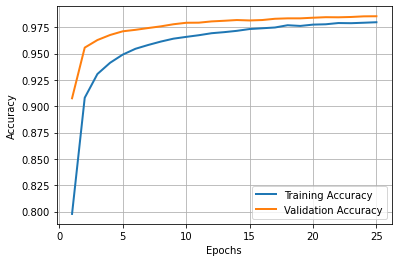

In [8]:
history_dict = history.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)

line1 = plt.plot(epochs, accuracy, label='Training Accuracy')
line2 = plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.setp(line1, linewidth=2.0)
plt.setp(line2, linewidth=2.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

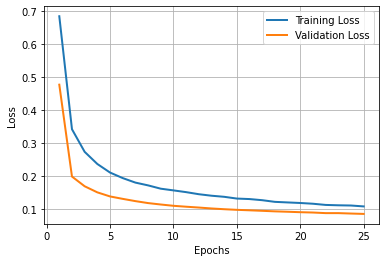

In [9]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

line1 = plt.plot(epochs, loss, label='Training Loss')
line2 = plt.plot(epochs, val_loss, label='Validation Loss')
plt.setp(line1, linewidth=2.0)
plt.setp(line2, linewidth=2.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Save Model

In [10]:
model.save("Hand_digit_recognition_model.h5")
print("Saved")


Saved


# Testing Model

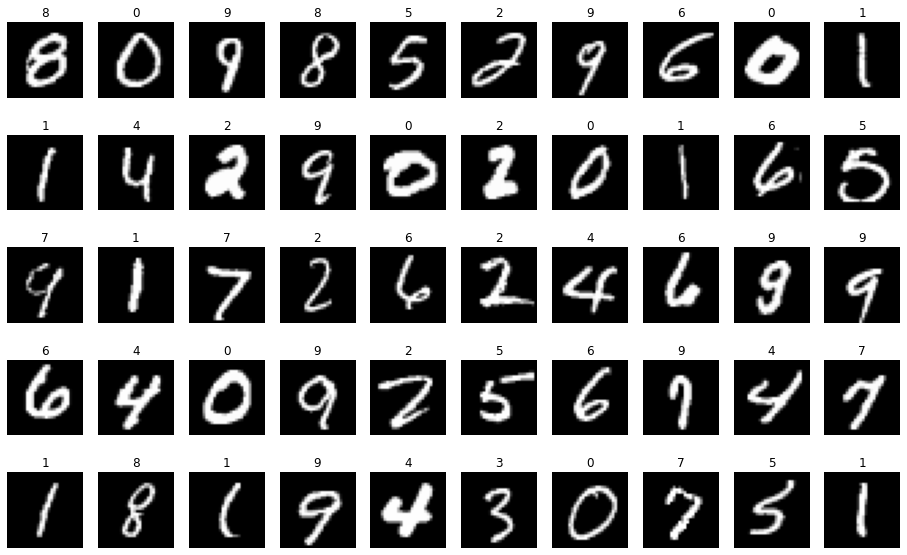

In [11]:
classifier = load_model('Hand_digit_recognition_model.h5')

plt.figure(figsize=(16,10))
num_of_images = 50 

for index in range(1, num_of_images + 1):
    rand = np.random.randint(0,len(x_test))
    input_img = x_test[rand].reshape(28,28)
    input_reshape_img = input_img.reshape(1,28,28,1) 
    res = str(np.argmax(classifier.predict(input_reshape_img), axis=-1)[0])
    plt.subplot(5, 10, index).set_title(f'{res}')
    plt.axis('off')
    plt.imshow(input_img, cmap='gray')